In [2]:
import pandas as pd

In [5]:
players = []
for x in range (1,54):
    url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page={0};template=results;type=allround'.format(x)
    df = pd.read_html(url)
    players.append(df[2])

In [6]:
players_df = pd.concat(players)

In [10]:
players_df.reset_index(drop=True, inplace=True)

In [49]:
players_df.to_csv('players.csv')

In [217]:
players_df = pd.read_csv('players.csv')

In [218]:
players_df.head()

,Unnamed: 0,Player,Span,Mat,Runs,HS,Bat Av,100,Wkts,BBI,Bowl Av,5,Ct,St,Ave Diff,Unnamed: 14
0,0,SR Tendulkar (INDIA),1989-2012,463,18426,200*,44.83,49,154,5/32,44.48,2,140,0,0.35,NaN
1,1,DPMD Jayawardene (Asia/SL),1998-2015,448,12650,144,33.37,19,8,2/56,70.37,0,218,0,-36.99,NaN
2,2,ST Jayasuriya (Asia/SL),1989-2011,445,13430,189,32.36,28,323,6/29,36.75,4,123,0,-4.39,NaN
3,3,KC Sangakkara (Asia/ICC/SL),2000-2015,404,14234,169,41.98,25,-,-,-,-,402,99,-,NaN
4,4,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,8064,124,23.57,6,395,7/12,34.51,9,127,0,-10.93,NaN


In [219]:
players_df.drop({'Unnamed: 14', 'Unnamed: 0'}, axis=1, inplace=True)

In [220]:
players_df.head()

,Player,Span,Mat,Runs,HS,Bat Av,100,Wkts,BBI,Bowl Av,5,Ct,St,Ave Diff
0,SR Tendulkar (INDIA),1989-2012,463,18426,200*,44.83,49,154,5/32,44.48,2,140,0,0.35
1,DPMD Jayawardene (Asia/SL),1998-2015,448,12650,144,33.37,19,8,2/56,70.37,0,218,0,-36.99
2,ST Jayasuriya (Asia/SL),1989-2011,445,13430,189,32.36,28,323,6/29,36.75,4,123,0,-4.39
3,KC Sangakkara (Asia/ICC/SL),2000-2015,404,14234,169,41.98,25,-,-,-,-,402,99,-
4,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,8064,124,23.57,6,395,7/12,34.51,9,127,0,-10.93


In [221]:
players_df = players_df[players_df['Mat'] > 150]

In [222]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Player    142 non-null    object
 1   Span      142 non-null    object
 2   Mat       142 non-null    int64 
 3   Runs      142 non-null    object
 4   HS        142 non-null    object
 5   Bat Av    142 non-null    object
 6   100       142 non-null    object
 7   Wkts      142 non-null    object
 8   BBI       142 non-null    object
 9   Bowl Av   142 non-null    object
 10  5         142 non-null    object
 11  Ct        142 non-null    object
 12  St        142 non-null    object
 13  Ave Diff  142 non-null    object
dtypes: int64(1), object(13)
memory usage: 16.6+ KB


In [223]:
players_df = players_df[['Player','Mat','Bat Av','Bowl Av','Ct']]

In [224]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   142 non-null    object
 1   Mat      142 non-null    int64 
 2   Bat Av   142 non-null    object
 3   Bowl Av  142 non-null    object
 4   Ct       142 non-null    object
dtypes: int64(1), object(4)
memory usage: 6.7+ KB


In [225]:
import numpy as np
players_df = players_df.replace('-', np.nan)

In [226]:
players_df.isnull().sum()

Player      0
Mat         0
Bat Av      0
Bowl Av    30
Ct          0
dtype: int64

In [227]:
players_df[['Bat Av', 'Bowl Av','Ct']] = players_df[['Bat Av', 'Bowl Av','Ct']].apply(pd.to_numeric)

In [228]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   142 non-null    object 
 1   Mat      142 non-null    int64  
 2   Bat Av   142 non-null    float64
 3   Bowl Av  112 non-null    float64
 4   Ct       142 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 6.7+ KB


In [229]:
players_df.isnull().sum()

Player      0
Mat         0
Bat Av      0
Bowl Av    30
Ct          0
dtype: int64

In [230]:
players_df['Bowl Av'] = players_df['Bowl Av'].fillna(250.00)

In [231]:
players_df['Bowl Av']

0       44.48
1       70.37
2       36.75
3      250.00
4       34.51
        ...  
137    250.00
138     43.56
139     29.29
140     25.26
141     35.40
Name: Bowl Av, Length: 142, dtype: float64

In [232]:
players_df.describe()

,Mat,Bat Av,Bowl Av,Ct
count,142.000000,142.000000,142.000000,142.000000
mean,230.732394,30.635423,82.300211,93.950704
std,66.198489,12.139926,88.767690,67.472960
min,151.000000,3.830000,1.000000,20.000000
25%,181.500000,23.037500,29.587500,52.250000
50%,216.000000,33.170000,36.735000,75.500000
75%,264.250000,39.255000,62.942500,112.500000
max,463.000000,59.330000,250.000000,417.000000


In [233]:
players_df.apply(lambda row: row['Ct'] / row['Mat'], axis=1)

0      0.302376
1      0.486607
2      0.276404
3      0.995050
4      0.319095
         ...   
137    1.000000
138    0.314103
139    0.209150
140    0.228758
141    0.397351
Length: 142, dtype: float64

In [234]:
players_df['Ct Rate'] = players_df.apply(lambda row: row['Ct'] / row['Mat'], axis=1)

In [235]:
players_df.head()

,Player,Mat,Bat Av,Bowl Av,Ct,Ct Rate
0,SR Tendulkar (INDIA),463,44.83,44.48,140,0.302376
1,DPMD Jayawardene (Asia/SL),448,33.37,70.37,218,0.486607
2,ST Jayasuriya (Asia/SL),445,32.36,36.75,123,0.276404
3,KC Sangakkara (Asia/ICC/SL),404,41.98,250.00,402,0.995050
4,Shahid Afridi (Asia/ICC/PAK),398,23.57,34.51,127,0.319095


In [236]:
players_df.drop('Ct', axis=1, inplace=True)

In [237]:
players_df.head()

,Player,Mat,Bat Av,Bowl Av,Ct Rate
0,SR Tendulkar (INDIA),463,44.83,44.48,0.302376
1,DPMD Jayawardene (Asia/SL),448,33.37,70.37,0.486607
2,ST Jayasuriya (Asia/SL),445,32.36,36.75,0.276404
3,KC Sangakkara (Asia/ICC/SL),404,41.98,250.00,0.995050
4,Shahid Afridi (Asia/ICC/PAK),398,23.57,34.51,0.319095


In [238]:
players = players_df['Player'].tolist()
players_df = players_df.drop(['Player','Mat'], axis = 1)

In [239]:
players_df

,Bat Av,Bowl Av,Ct Rate
0,44.83,44.48,0.302376
1,33.37,70.37,0.486607
2,32.36,36.75,0.276404
3,41.98,250.00,0.995050
4,23.57,34.51,0.319095
...,...,...,...
137,26.09,250.00,1.000000
138,31.86,43.56,0.314103
139,13.43,29.29,0.209150
140,16.11,25.26,0.228758


In [240]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=4)

# fit the input data
kmeans = kmeans.fit(players_df)

# get the cluster labels
labels = kmeans.predict(players_df)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

In [241]:
players_df['Cluster'] = clusters
players_df['Player'] = players
players_df

,Bat Av,Bowl Av,Ct Rate,Cluster,Player
0,44.83,44.48,0.302376,2,SR Tendulkar (INDIA)
1,33.37,70.37,0.486607,2,DPMD Jayawardene (Asia/SL)
2,32.36,36.75,0.276404,2,ST Jayasuriya (Asia/SL)
3,41.98,250.00,0.995050,1,KC Sangakkara (Asia/ICC/SL)
4,23.57,34.51,0.319095,0,Shahid Afridi (Asia/ICC/PAK)
...,...,...,...,...,...
137,26.09,250.00,1.000000,1,Kamran Akmal (PAK)
138,31.86,43.56,0.314103,2,Aamer Sohail (PAK)
139,13.43,29.29,0.209150,0,Abdur Razzak (BDESH)
140,16.11,25.26,0.228758,0,MG Johnson (AUS)


In [248]:
grouped = players_df.groupby(players_df.Cluster)

cluster_one = grouped.get_group(0)
cluster_two = grouped.get_group(1)
cluster_three = grouped.get_group(2)
cluster_four = grouped.get_group(3)

In [250]:
cluster_one

,Bat Av,Bowl Av,Ct Rate,Cluster,Player
4,23.57,34.51,0.319095,0,Shahid Afridi (Asia/ICC/PAK)
7,16.52,23.52,0.247191,0,Wasim Akram (PAK)
9,6.80,23.08,0.371429,0,M Muralitharan (Asia/ICC/SL)
15,13.68,27.53,0.186335,0,WPUJC Vaas (Asia/SL)
19,26.45,24.50,0.356436,0,SM Pollock (Afr/ICC/SA)
23,17.33,31.71,0.298305,0,DL Vettori (ICC/NZ)
30,10.53,30.89,0.313653,0,A Kumble (Asia/INDIA)
36,10.30,23.84,0.133588,0,Waqar Younis (PAK)
41,3.83,22.02,0.148000,0,GD McGrath (AUS/ICC)
49,13.30,33.35,0.300847,0,Harbhajan Singh (Asia/INDIA)


In [251]:
cluster_two

,Bat Av,Bowl Av,Ct Rate,Cluster,Player
3,41.98,250.0,0.995050,1,KC Sangakkara (Asia/ICC/SL)
22,28.57,250.0,1.366102,1,MV Boucher (Afr/SA)
25,35.89,250.0,1.452962,1,AC Gilchrist (AUS/ICC)
32,37.57,250.0,0.261194,1,MS Atapattu (SL)
37,30.41,250.0,1.007692,1,BB McCullum (NZ)
42,36.13,250.0,0.435484,1,HH Gibbs (SA)
46,35.11,250.0,0.428571,1,JN Rhodes (SA)
48,41.37,250.0,0.247899,1,DL Haynes (WI)
50,39.40,250.0,0.351695,1,EJG Morgan (ENG/IRE)
51,33.74,250.0,0.212766,1,WU Tharanga (Asia/SL)


In [252]:
cluster_three

,Bat Av,Bowl Av,Ct Rate,Cluster,Player
0,44.83,44.48,0.302376,2,SR Tendulkar (INDIA)
1,33.37,70.37,0.486607,2,DPMD Jayawardene (Asia/SL)
2,32.36,36.75,0.276404,2,ST Jayasuriya (Asia/SL)
5,39.52,21.33,0.298942,2,Inzamam-ul-Haq (Asia/PAK)
6,42.03,34.66,0.426667,2,RT Ponting (AUS/ICC)
...,...,...,...,...,...
122,31.88,36.57,0.351515,2,RA Jadeja (INDIA)
125,44.61,27.00,0.329268,2,DM Jones (AUS)
131,37.87,14.66,0.335404,2,IR Bell (ENG)
138,31.86,43.56,0.314103,2,Aamer Sohail (PAK)


In [253]:
cluster_four

,Bat Av,Bowl Av,Ct Rate,Cluster,Player
35,31.24,96.00,0.509434,3,Younis Khan (PAK)
40,32.33,95.20,0.360000,3,Ijaz Ahmed (PAK)
43,59.33,166.25,0.516129,3,V Kohli (INDIA)
102,48.15,117.50,0.567568,3,MEK Hussey (AUS)


<IPython.core.display.Javascript object>


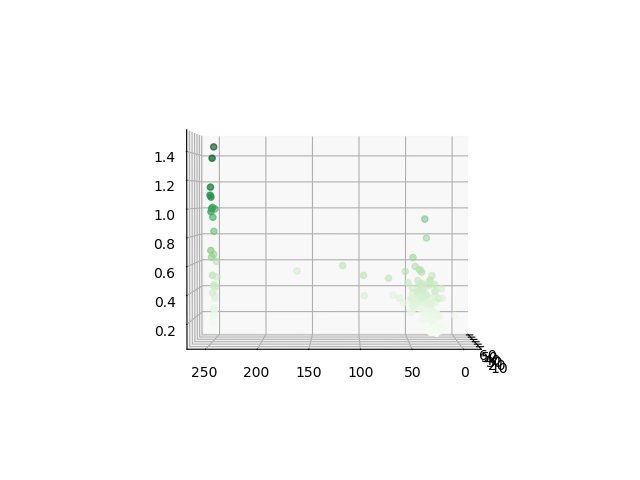

In [260]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = players_df['Ct Rate']
xdata = players_df['Bat Av']
ydata = players_df['Bowl Av']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');